#Import Dataset 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/RAKAMIN/Project 4.0/Clicked Ads Dataset.csv')

In [4]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [6]:
df.groupby('Clicked on Ad').agg

<bound method DataFrameGroupBy.aggregate of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f9bf61c1d00>>

In [7]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


#Exploratory Data Analysis

##Univariate Analysis

In [8]:
#Data Numerik
numeric = df.select_dtypes(include=np.number).columns

#Data Kategorik
categoric = df.select_dtypes(exclude=np.number).columns

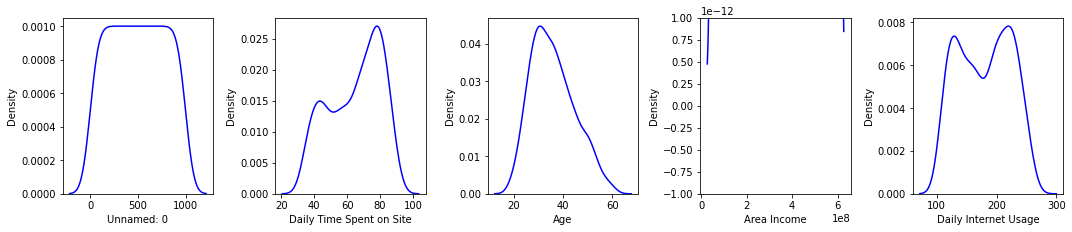

In [9]:
features = numeric
plt.figure(figsize=(15, 15))
for i in range(0, len(numeric)):
    plt.subplot(5, 5, i+1)
    #sns.FacetGrid(df, hue = 'Clicked on Ad', height=5).map(sns.distplot, features[i]).add_legend()
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

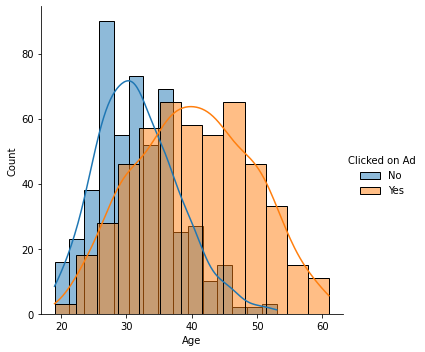

In [10]:
sns.FacetGrid(df, hue = 'Clicked on Ad', height=5).map(sns.histplot, 'Age', kde=True).add_legend()

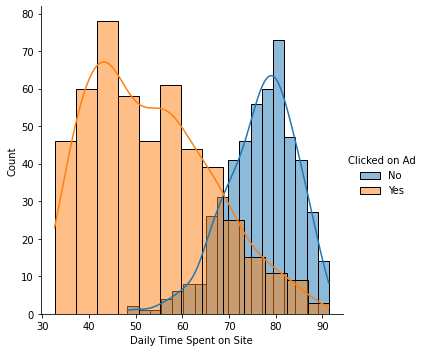

In [11]:
sns.FacetGrid(df, hue = 'Clicked on Ad', height=5).map(sns.histplot, 'Daily Time Spent on Site', kde=True).add_legend()

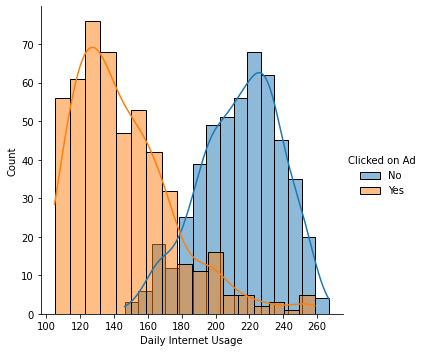

In [12]:
sns.FacetGrid(df, hue = 'Clicked on Ad', height=5).map(sns.histplot, 'Daily Internet Usage', kde=True).add_legend()

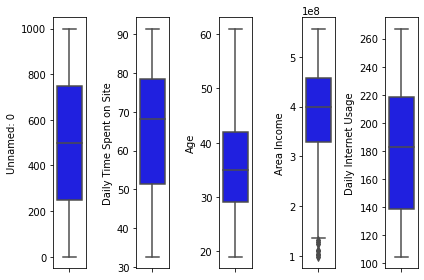

In [13]:
features = numeric
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue', orient='v')
    plt.tight_layout()

Interpretasi:

-Rentang usia pengguna internet usia 20 - 60 tahun, dan orang dengan usia 40 ke atas cenderung melakukan klik pada iklan yang ditayangkan dibandingkan usia dibawahnya


-Waktu pemakaian pengguna internet kurang dari 70 menit per hari cenderung melakukan klik pada iklan. Orang–orang seperti ini dimungkinkan memang mencari informasi yang dibutuhkan sesuai iklan yang dibutuhkan.


-Orang-orang dengan pemakaian internet relatif kecil cenderung efektif melakukan klik iklan dibandingkan yang  melakukan penggunaan besar


##Bivariate Analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
 10  Clicked[Y/N]              1000 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [27]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
Clicked[Y/N]                 0
dtype: int64

In [28]:
analysis_uni = df[['Age', 'Daily Time Spent on Site','Daily Internet Usage', 'Area Income']]

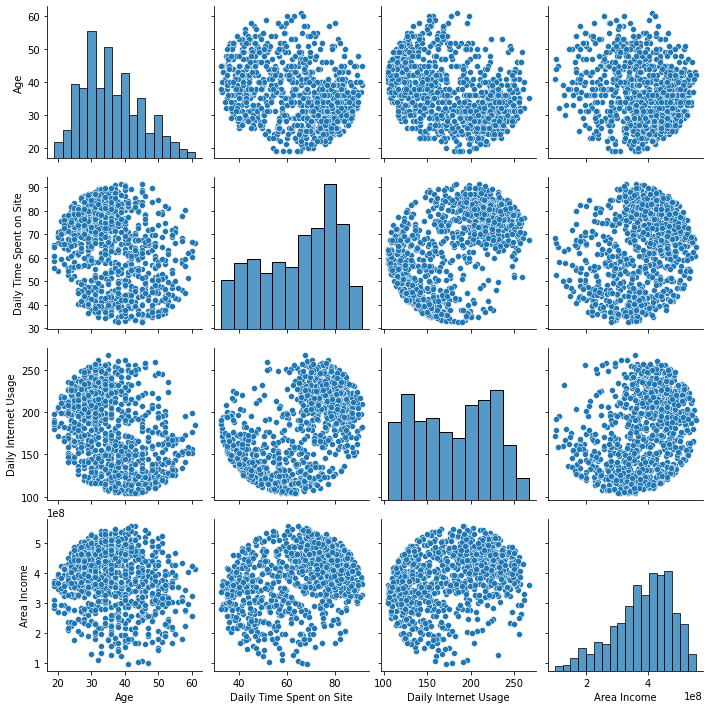

In [29]:
sns.pairplot(data=analysis_uni)

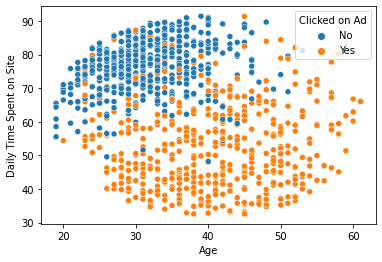

In [31]:
sns.scatterplot(x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad', data =df)

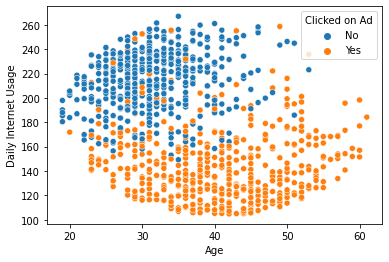

In [32]:
sns.scatterplot(x='Age', y='Daily Internet Usage', hue='Clicked on Ad', data =df)

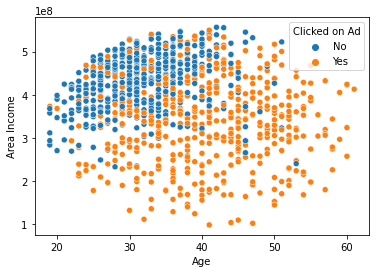

In [33]:
sns.scatterplot(x='Age', y='Area Income', hue='Clicked on Ad', data =df)

##Multivariate Analysis

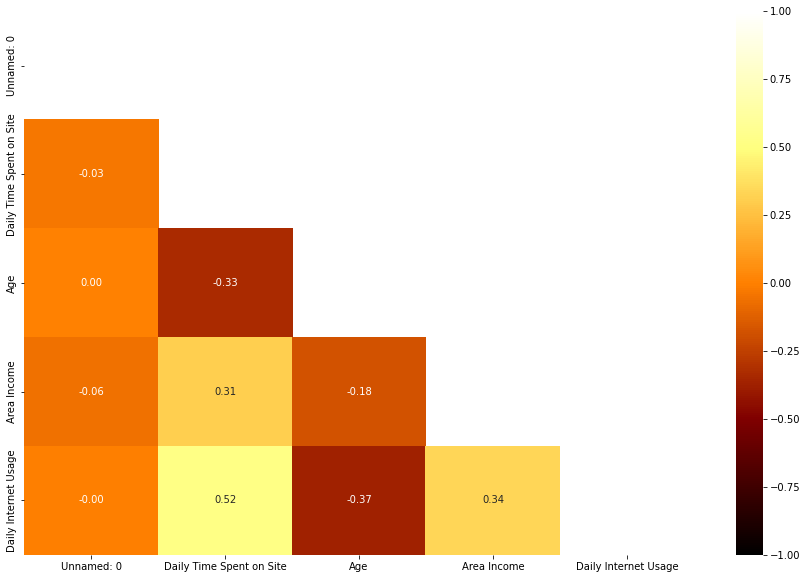

In [21]:

plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap='afmhot', annot=True, vmin=-1,vmax=1,mask=mask,fmt='.2f')

interpretasi :
Penggunaan internet harian memiliki korelasi tinggi terhadap waktu yang digunakan dalam mengakses website. Korelasi ini menunjukkan medium relasi, semakin lama pengguna menggunaka internet, maka semakin tinggi pula pengguinaan kuota yang dihabiskan.

In [22]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [23]:
df['Clicked on Ad'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df['Clicked[Y/N]'] = df['Clicked on Ad'] .map({'Yes':1, 'No':0})

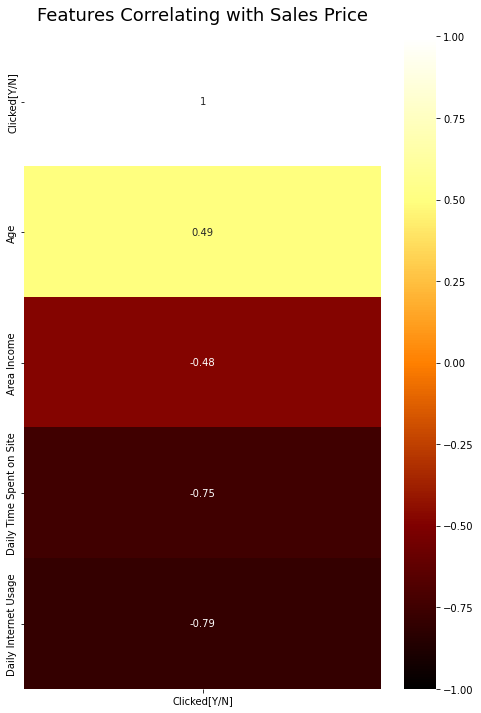

In [25]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Clicked[Y/N]']].sort_values(by='Clicked[Y/N]', ascending=False), vmin=-1, vmax=1, annot=True, cmap='afmhot')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

Interpretasi : Hubungan antara setiap fitur terhadap targe. Penggunaan harian dan waktu yang digunakan memiliki korelasi tinggi terhadap clik iklan yang dibuat. Artinya bisa jadi konten yang di akses menarik sehingga pelanggan betah untuk mengakses iklan, sehingga pelanggan melakukan click iklan.

#Data Cleaning and Preprocessing

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
 10  Clicked[Y/N]              1000 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [46]:
#change 'column' male to 'gender'
df.rename(columns={'Male':'Gender'}, inplace=True)

In [47]:
df.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
Clicked[Y/N]                 0
dtype: int64

In [48]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].median(), inplace=True)
df['Area Income'].fillna(df['Area Income'].median(), inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].median(), inplace=True)

In [49]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [50]:
print('Missing value setiap kolom setelah di handle :'), df.isna().sum()

Missing value setiap kolom setelah di handle :


(None, Daily Time Spent on Site    0
 Age                         0
 Area Income                 0
 Daily Internet Usage        0
 Gender                      0
 Timestamp                   0
 Clicked on Ad               0
 city                        0
 province                    0
 category                    0
 Clicked[Y/N]                0
 dtype: int64)

In [51]:
df.duplicated().sum()

0

##Feature Encoding

In [52]:
df['Gender'].unique()

array(['Perempuan', 'Laki-Laki'], dtype=object)

In [53]:
df['Gender'] = df['Gender'].map({'Perempuan':0, 'Laki-Laki':1})

In [54]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [55]:
df = df.drop(['Clicked on Ad'], axis=1)

In [56]:
df.city.unique()

array(['Jakarta Timur', 'Denpasar', 'Surabaya', 'Batam', 'Medan',
       'Jakarta Barat', 'Bandung', 'Bandar Lampung', 'Jakarta Pusat',
       'Depok', 'Serang', 'Padang', 'Semarang', 'Makassar', 'Malang',
       'Jakarta Utara', 'Pontianak', 'Jakarta Selatan', 'Tasikmalaya',
       'Surakarta', 'Bekasi', 'Tangerang', 'Cimahi', 'Banjarmasin',
       'Palembang', 'Samarinda', 'Pakanbaru', 'Tangerang Selatan',
       'Bogor', 'Balikpapan'], dtype=object)

In [57]:
df.province.unique()

array(['Daerah Khusus Ibukota Jakarta', 'Bali', 'Jawa Timur',
       'Kepulauan Riau', 'Sumatra Utara', 'Jawa Barat', 'Lampung',
       'Banten', 'Sumatra Barat', 'Jawa Tengah', 'Sulawesi Selatan',
       'Kalimantan Barat', 'Kalimantan Selatan', 'Sumatra Selatan',
       'Kalimantan Timur', 'Riau'], dtype=object)

In [58]:
df.category.unique()

array(['Furniture', 'Food', 'Electronic', 'House', 'Finance', 'Travel',
       'Health', 'Bank', 'Fashion', 'Otomotif'], dtype=object)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Gender                    1000 non-null   int64         
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   city                      1000 non-null   object        
 7   province                  1000 non-null   object        
 8   category                  1000 non-null   object        
 9   Clicked[Y/N]              1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
column_le = ['city','province','category']

In [62]:
column_le_new = df[column_le].apply(le.fit_transform)
column_le_new

,city,province,category
0,13,2,5
1,8,0,4
2,25,5,1
3,4,9,7
4,17,15,3
...,...,...,...
995,23,4,3
996,19,11,1
997,22,8,9
998,27,1,0


In [63]:
df.drop(column_le, inplace=True, axis=1)

In [64]:
df_new = pd.merge(left=df,
                 right=column_le_new,
                 left_index=True,
                 right_index=True)

In [65]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Gender                    1000 non-null   int64         
 5   Timestamp                 1000 non-null   datetime64[ns]
 6   Clicked[Y/N]              1000 non-null   int64         
 7   city                      1000 non-null   int64         
 8   province                  1000 non-null   int64         
 9   category                  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 78.2 KB


In [66]:
df_new['Year_visit'] = df['Timestamp'].dt.year
df_new['Month_visit'] = df['Timestamp'].dt.month
df_new['Day_visit'] = df['Timestamp'].dt.day
df_new['Hour_visit'] = df['Timestamp'].dt.hour

In [67]:
df_new.drop('Timestamp', inplace=True, axis = 1)

In [68]:
pd.set_option("display.max_columns", None) #Mengubah settingan default agar kolom terlihat semua tanpa ada ter skip '...'

In [69]:
df_new.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked[Y/N],city,province,category,Year_visit,Month_visit,Day_visit,Hour_visit
0,68.95,35,432837300.0,256.09,0,0,13,2,5,2016,3,27,0
1,80.23,31,479092950.0,193.77,1,0,8,0,4,2016,4,4,1
2,69.47,26,418501580.0,236.50,0,0,25,5,1,2016,3,13,20
3,74.15,29,383643260.0,245.89,1,0,4,9,7,2016,1,10,2
4,68.37,35,517229930.0,225.58,0,0,17,15,3,2016,6,3,3


In [70]:
df_new.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Clicked[Y/N]', 'city', 'province',
       'category', 'Year_visit', 'Month_visit', 'Day_visit', 'Hour_visit'],
      dtype='object')

In [71]:
x_data = df_new[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender',  'Year_visit',
       'Month_visit', 'Day_visit', 'Hour_visit', 'city', 'province', 'category']]
y_data = df_new['Clicked[Y/N]']

In [72]:
x_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Year_visit,Month_visit,Day_visit,Hour_visit,city,province,category
0,68.95,35,432837300.0,256.09,0,2016,3,27,0,13,2,5
1,80.23,31,479092950.0,193.77,1,2016,4,4,1,8,0,4
2,69.47,26,418501580.0,236.50,0,2016,3,13,20,25,5,1
3,74.15,29,383643260.0,245.89,1,2016,1,10,2,4,9,7
4,68.37,35,517229930.0,225.58,0,2016,6,3,3,17,15,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,499691990.0,208.58,1,2016,2,11,21,23,4,3
996,51.30,45,474475190.0,134.42,1,2016,4,22,2,19,11,1
997,68.11,51,296910040.0,120.37,1,2016,2,1,17,22,8,9
998,55.55,19,293445530.0,187.95,0,2016,3,24,2,27,1,0


In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, 
                                                   random_state=123)

Data dipisahkan menjadi 80% data training dan 20% data test

#Eksperimen Machine Learning

##Without normalisasi


In [74]:
import sklearn
sklearn.__version__

'1.0.2'

Algoritma yang akan digunakan adalah Naive Bayes, Random Forest, dan Logistic Regression

###Logistic Regression (Tanpa normalisasi)

In [75]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
lr.fit(x_train, y_train) 

LogisticRegression()

In [76]:
y_predicted_lr = lr.predict(x_test) # prediksi data test menggunakan nama model yang telah dibuat
from sklearn.metrics import accuracy_score #import metrci yang akan digunakan untuk mengevaluasi model yang akan dibuat
#from sklearn.metrics import f1_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
print('accuracy score data test :', accuracy_score(y_test, y_predicted_lr))

accuracy score data test : 0.51


In [77]:
y_training_lr = lr.predict(x_train) # prediksi data test
print('accuracy score data training :', accuracy_score(y_train, y_training_lr)) 
print('accuracy score data test :', accuracy_score(y_test, y_predicted_lr))#

accuracy score data training : 0.4975
accuracy score data test : 0.51


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x1080 with 0 Axes>

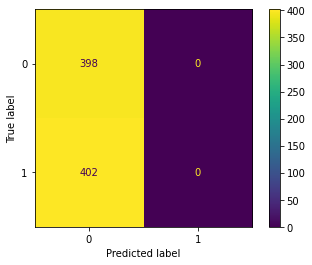

In [78]:
plt.figure(figsize=(15,15))
from sklearn.metrics import plot_confusion_matrix
lr.fit(x_train, y_train)
plot_confusion_matrix(lr, x_train, y_train)  
plt.show()

In [79]:
from sklearn.metrics import classification_report
print('Lr Classification report\n',
      classification_report(y_test, y_predicted_lr))

Lr Classification report
               precision    recall  f1-score   support

           0       0.51      1.00      0.68       102
           1       0.00      0.00      0.00        98

    accuracy                           0.51       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
#Model memiliki tingkat keakuratang yang cukup rendah, data belum dilakukan normalisasi
#print("Number of mislabeled points out of a total %d points : %d"

In [81]:
print("Number of mislabeled points out of a total %d points : %d"
      % (x_train.shape[0], (y_train != y_training_lr).sum()))

Number of mislabeled points out of a total 800 points : 402


Nilai Evaluasi accuracy model kecil dikarenakan fitur belum dilakukan normalisasi Konsep yang digunakan pada algoritma logistic regression adalah probability, sehingga kalkulasi prediksi yang menghasilkan dibawah 0.5 akan memprediksi 0, dan nilai prediksi yang menghasilkan probability diatas 0.5 menghasilkan prediksi 1

###Random Forest Classifier (tanpa normalisasi)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#x_train, y_train = make_classification(n_samples=1000, n_features=4,
#                           n_informative=2, n_redundant=0,
#                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [83]:
y_predict_clf = clf.predict(x_test)
accuracy_score(y_test, y_predict_clf )

0.965

In [84]:
#print('accuracy score data training :', accuracy_score(y_train, y_predict_clf)) 
print('accuracy score data test :', accuracy_score(y_test, y_predict_clf))#

accuracy score data test : 0.965


In [85]:
from sklearn.metrics import classification_report
print('clf Classification report\n',
      classification_report(y_test, y_predict_clf))

clf Classification report
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       102
           1       0.98      0.95      0.96        98

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



###Naive Baiyes (tanpa normalisasi)

In [86]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [87]:
 x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=123)

In [88]:
gnb.fit(x_train, y_train)

GaussianNB()

In [89]:
y_predict_gnb = gnb.predict(x_test)

In [90]:
accuracy_score(y_test, y_predict_gnb)

0.69

In [91]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (x_test.shape[0], (y_test != y_predict_gnb).sum()))

Number of mislabeled points out of a total 200 points : 62


In [92]:
from sklearn.metrics import classification_report
print('Gnb Classification report\n',
      classification_report(y_test, y_predict_gnb))

Gnb Classification report
               precision    recall  f1-score   support

           0       0.65      0.84      0.74       102
           1       0.76      0.53      0.63        98

    accuracy                           0.69       200
   macro avg       0.71      0.69      0.68       200
weighted avg       0.71      0.69      0.68       200



##With Normalisasi

In [93]:
df_new2 = df_new.copy()

In [94]:
df_new2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Clicked[Y/N],city,province,category,Year_visit,Month_visit,Day_visit,Hour_visit
0,68.95,35,432837300.0,256.09,0,0,13,2,5,2016,3,27,0
1,80.23,31,479092950.0,193.77,1,0,8,0,4,2016,4,4,1
2,69.47,26,418501580.0,236.50,0,0,25,5,1,2016,3,13,20
3,74.15,29,383643260.0,245.89,1,0,4,9,7,2016,1,10,2
4,68.37,35,517229930.0,225.58,0,0,17,15,3,2016,6,3,3


In [95]:
df_new2.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Clicked[Y/N]', 'city', 'province',
       'category', 'Year_visit', 'Month_visit', 'Day_visit', 'Hour_visit'],
      dtype='object')

In [96]:
columns = ['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'city', 'province',
       'category', 'Year_visit', 'Month_visit', 'Day_visit', 'Hour_visit']

In [98]:
df2_new_to_norm = df_new2[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'city', 'province',
       'category', 'Year_visit', 'Month_visit', 'Day_visit', 'Hour_visit']]

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaler = scaler.fit_transform(df2_new_to_norm)

In [100]:
data_scaler

array([[0.61788203, 0.38095238, 0.73047247, ..., 0.33333333, 0.86666667,
        0.        ],
       [0.80962094, 0.28571429, 0.83137522, ..., 0.5       , 0.1       ,
        0.04347826],
       [0.62672106, 0.16666667, 0.69920032, ..., 0.33333333, 0.4       ,
        0.86956522],
       ...,
       [0.6036036 , 0.76190476, 0.43395874, ..., 0.16666667, 0.        ,
        0.73913043],
       [0.39010709, 0.        , 0.4264012 , ..., 0.33333333, 0.76666667,
        0.08695652],
       [0.2109468 , 0.16666667, 0.24247537, ..., 0.83333333, 0.06666667,
        0.91304348]])

In [101]:
df_norm =pd.DataFrame(data= data_scaler, columns = columns)

In [102]:
df_ml = pd.merge(left= df_norm,
                 right = df_new['Clicked[Y/N]'],
                 left_index=True,
                 right_index=True)

In [103]:
df_ml.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,city,province,category,Year_visit,Month_visit,Day_visit,Hour_visit,Clicked[Y/N]
0,0.617882,0.380952,0.730472,0.932688,0.0,0.448276,0.133333,0.555556,0.0,0.333333,0.866667,0.000000,0
1,0.809621,0.285714,0.831375,0.548542,1.0,0.275862,0.000000,0.444444,0.0,0.500000,0.100000,0.043478,0
2,0.626721,0.166667,0.699200,0.811934,0.0,0.862069,0.333333,0.111111,0.0,0.333333,0.400000,0.869565,0
3,0.706272,0.238095,0.623160,0.869814,1.0,0.137931,0.600000,0.777778,0.0,0.000000,0.300000,0.086957,0
4,0.608023,0.380952,0.914568,0.744622,0.0,0.586207,1.000000,0.333333,0.0,0.833333,0.066667,0.130435,0


In [104]:
df_ml['Clicked[Y/N]'].unique()

array([0, 1])

In [105]:
df_ml.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'city', 'province', 'category',
       'Year_visit', 'Month_visit', 'Day_visit', 'Hour_visit', 'Clicked[Y/N]'],
      dtype='object')

###Logistic Regression Regression

In [106]:
x_norm_data = df_ml[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'city', 'province', 'category',
       'Year_visit', 'Month_visit', 'Day_visit', 'Hour_visit']]
y_norm_data = df_ml['Clicked[Y/N]']

In [107]:
from sklearn.model_selection import train_test_split
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm_data, y_norm_data, test_size=0.2, 
                                                   random_state=123)

In [108]:
from sklearn.linear_model import LogisticRegression #Import model sklearn logistic regression
lr = LogisticRegression() #Definisikan menggunakan sebuah parameter assign 
lr.fit(x_train_norm, y_train_norm) #model di fitkan menggunakan data dependet dan independent

LogisticRegression()

In [109]:
y_predicted_lr_norm = lr.predict(x_test_norm) # prediksi data test menggunakan nama model yang tgelah dibuat
from sklearn.metrics import accuracy_score #import metrci yang akan digunakan untuk mengevaluasi model yang akan dibuat
print('accuracy score data test :', accuracy_score(y_test, y_predicted_lr_norm))

accuracy score data test : 0.975


In [110]:
y_training_lr_norm = lr.predict(x_train_norm) # prediksi data test
print('accuracy score data training :', accuracy_score(y_train_norm, y_training_lr_norm)) 
print('accuracy score data test :', accuracy_score(y_test_norm, y_predicted_lr_norm))#

accuracy score data training : 0.965
accuracy score data test : 0.975


In [111]:
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test_norm.shape[0], (y_test_norm != y_predicted_lr_norm).sum()))

Number of mislabeled points out of a total 200 points : 5


In [112]:
from sklearn.metrics import classification_report
print('Lr Classification report\n',
      classification_report(y_test, y_predicted_lr_norm))

Lr Classification report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       102
           1       0.99      0.96      0.97        98

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



###Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm_data, y_norm_data, test_size=0.2, 
                                                   random_state=123)
#x_train_norm, y_train_norm = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train_norm, y_train_norm)

RandomForestClassifier(max_depth=2, random_state=0)

In [114]:
from sklearn.model_selection import train_test_split
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm_data, y_norm_data, test_size=0.2, 
                                                   random_state=123)

In [115]:
#model_rdn.fit(x_test_norm, y_test_norm)
y_predict_clf_norm = clf.predict(x_train_norm)
y_predict_clf2_norm = clf.predict(x_test_norm)
accuracy_score(y_train_norm, y_predict_clf_norm )

0.95875

In [116]:
print('accuracy score data training :', accuracy_score(y_train_norm, y_predict_clf_norm)) 
print('accuracy score data test :', accuracy_score(y_test_norm, y_predict_clf2_norm))#

accuracy score data training : 0.95875
accuracy score data test : 0.975


In [117]:
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test_norm.shape[0], (y_test_norm != y_predict_clf2_norm).sum()))

Number of mislabeled points out of a total 200 points : 5


Feature: 0, Score: 0.32020
Feature: 1, Score: 0.14489
Feature: 2, Score: 0.14554
Feature: 3, Score: 0.35319
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00748
Feature: 6, Score: 0.00685
Feature: 7, Score: 0.00518
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00268
Feature: 10, Score: 0.00727
Feature: 11, Score: 0.00672


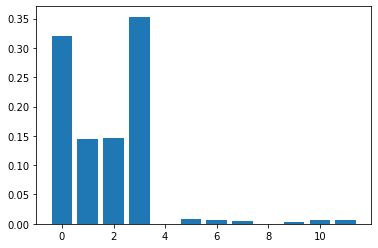

In [118]:
from matplotlib import pyplot
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [119]:
print('Pada Model Random Forest didapatkan Daily Spend time memiliki nilai paling tinggi yaitu 0.36,Daily Internet Usage 0.28, umur 0.14, dan income 0.17')

Pada Model Random Forest didapatkan Daily Spend time memiliki nilai paling tinggi yaitu 0.36,Daily Internet Usage 0.28, umur 0.14, dan income 0.17


In [120]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.0 MB/s 


In [121]:
# Fits the explainer
import shap
explainer = shap.Explainer(clf.predict, x_train_norm)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_train_norm)

Permutation explainer: 801it [08:28,  1.57it/s]


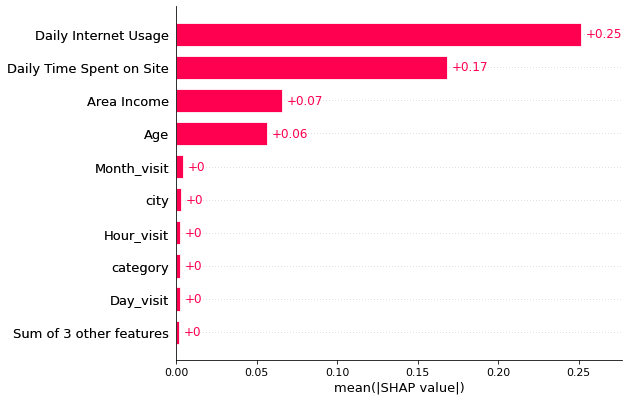

In [122]:
shap.plots.bar(shap_values)

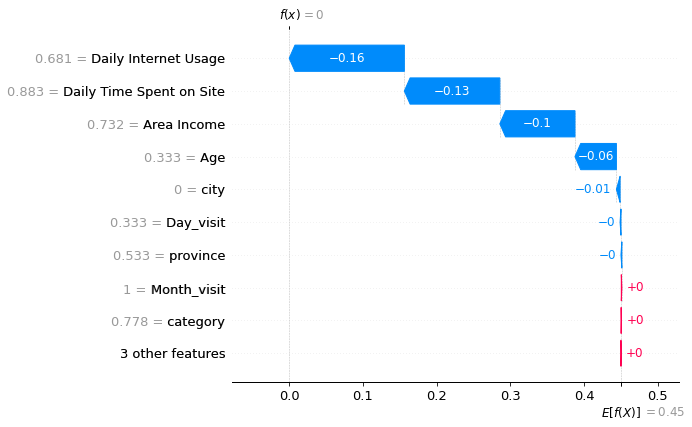

In [123]:
shap.plots.waterfall(shap_values[0])

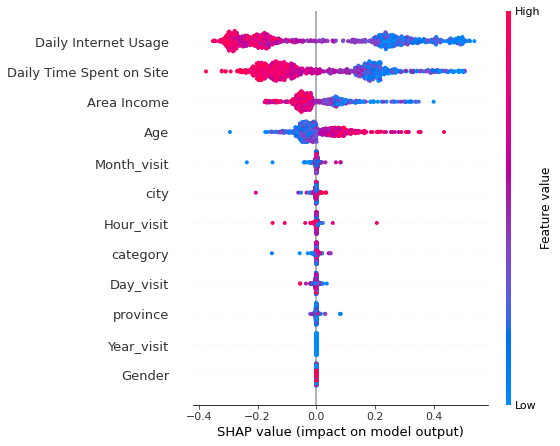

In [124]:
shap.summary_plot(shap_values)

Business Insight Based on Machine Learning Feature Importance:
    

Semakin lama orang menghasbiskan waktu membuka website, semakin berpotensi melakukan click pada iklan yang kita pasang

Orang yang usianya tua berpotensi melakukan click (targeted market)

Terdapat jam-jam tertentu (jam-jam produktif) seseorang cenderung melakukan klik iklan


Business Recommendation #

Penyetelan iklan di targetkan pada rentang usia yang tua dan rentang yang lebih tertarget
Pengaturan iklan hanya efektif dilakukan pada jam-jam produktif (dan tidak menyalakan iklan pada jam tidur) 
Penentuan Budgeting

In [125]:
df_new2.Age.describe()

count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64

###Naive Baiyes

In [126]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [127]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm_data, y_norm_data, test_size=0.2, random_state=123)

In [128]:
gnb.fit(x_train_norm, y_train_norm)

GaussianNB()

In [129]:
y_training_gnb_norm = gnb.predict(x_train_norm)

In [130]:
y_predict_gnb_norm =  gnb.predict(x_test_norm)

In [131]:
accuracy_score(y_train_norm, y_training_gnb_norm)

0.965

In [132]:
y_predict_gnb = gnb.predict(x_test_norm)
accuracy_score(y_test_norm, y_predict_gnb_norm)

0.98

Model yang dipilih Naive Baiyes

In [ ]:
#print('Jumlah data(training, test)', y_train_norm.shape, y_test_norm.shape)

In [133]:
import shap
explainer = shap.Explainer(gnb.predict, x_train_norm)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_train_norm)

Permutation explainer: 801it [00:49, 12.82it/s]


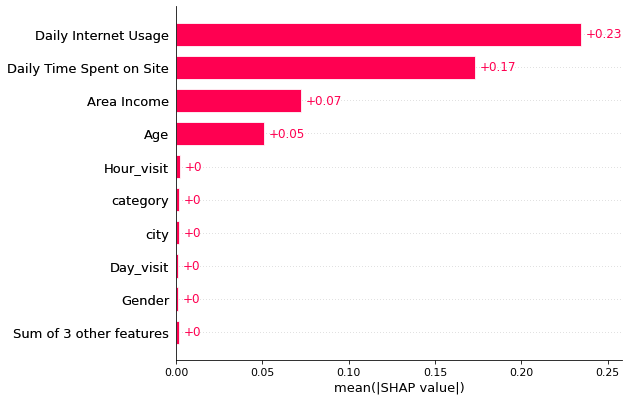

In [134]:
shap.plots.bar(shap_values)

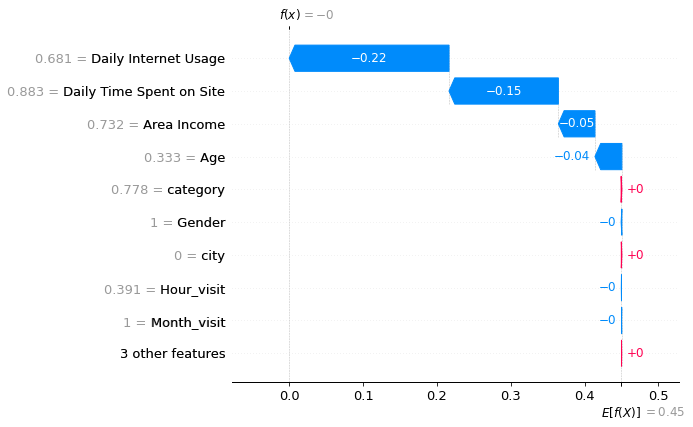

In [135]:
shap.plots.waterfall(shap_values[0])

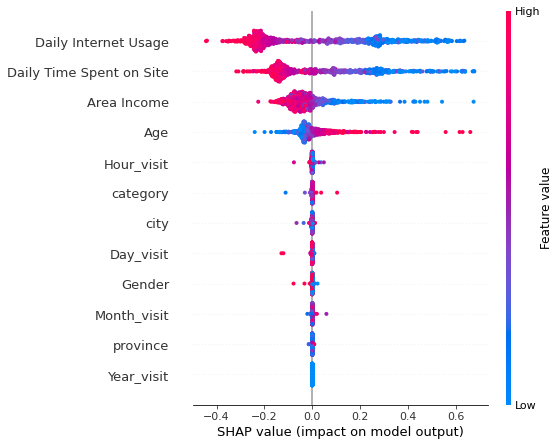

In [136]:
shap.summary_plot(shap_values)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


<Figure size 1080x1080 with 0 Axes>

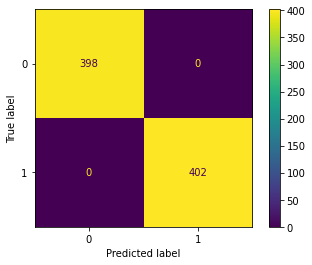

In [137]:
plt.figure(figsize=(15,15))
from sklearn.metrics import plot_confusion_matrix
gnb.fit(x_train_norm, y_train_norm)
plot_confusion_matrix(gnb, x_train_norm, y_training_gnb_norm)  
plt.show()

In [138]:
from sklearn.metrics import classification_report
print('Gnb Classification report\n',
      classification_report(y_test, y_predict_gnb_norm))

Gnb Classification report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.98      0.98      0.98        98

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

